## project (House Prices)

<a id='content'></a>
 
## content
<ul>


    
<li><a href="#load data "> load data </a></li>

<li><a href="#data assessing"> Data assessing </a></li>

</ul>

In [30]:
import kaggle 
from zipfile import ZipFile
from kaggle.api.kaggle_api_extended import KaggleApi

In [31]:
api = KaggleApi()
api.authenticate()

In [32]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques


In [33]:
# specifying the zip file name
file_name = "house-prices-advanced-regression-techniques.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    zip.extractall()


File Name                                             Modified             Size
data_description.txt                           2019-12-15 21:33:36        13370
sample_submission.csv                          2019-12-15 21:33:36        31939
test.csv                                       2019-12-15 21:33:36       451405
train.csv                                      2019-12-15 21:33:36       460676


In [34]:
# import libraries
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt 
import plotly.express as px
import graphviz
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn import tree
import joblib
from sklearn.feature_selection import SelectPercentile , chi2
from sklearn.linear_model import LinearRegression  , Ridge


<a id='load data'></a>
## load Data

<a href="#content">back to content </a>


In [35]:
df=pd.read_csv('train.csv' )

In [36]:
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 300)

In [37]:
df.shape

(1460, 81)

In [38]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id='data assessing'></a> 
## Data Assessing 


<a href="#content">back to content </a>


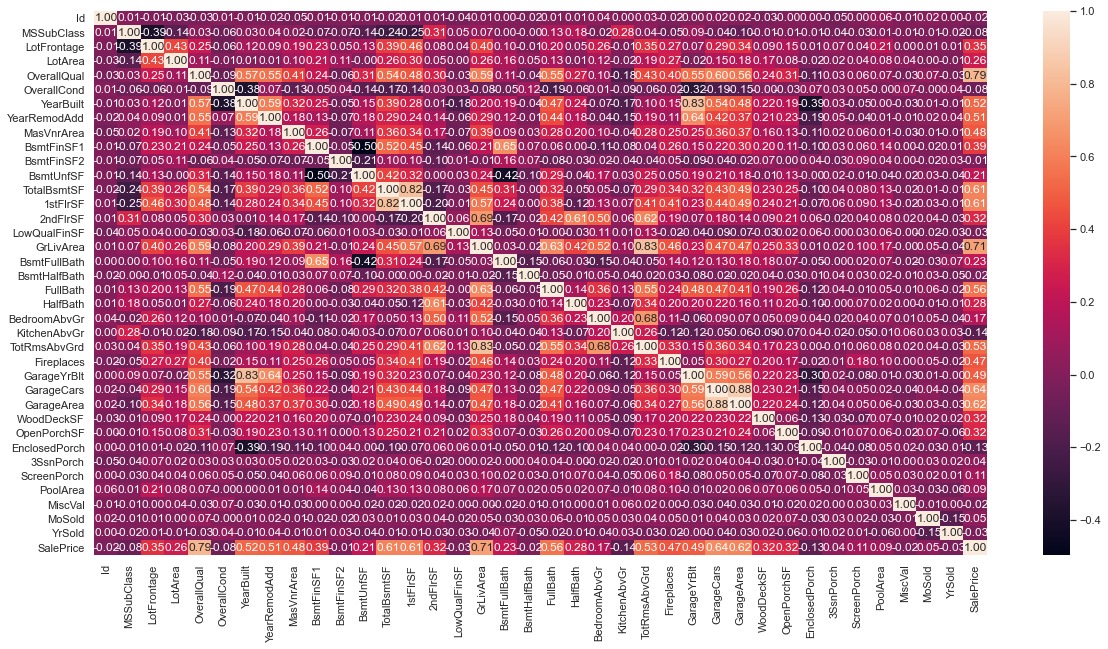

In [39]:
# correlation  between features 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='0.2f');


In [40]:
# list of features categorical 
list_feature=[]
for i in df.columns:
    if df[f'{i}'].dtype=='O':
        list_feature.append(i)
len(list_feature)

43

In [41]:
df2=df.copy()
# convert categorical to numerical 
enc = OrdinalEncoder()
df2[list_feature]=enc.fit_transform(df2[list_feature])


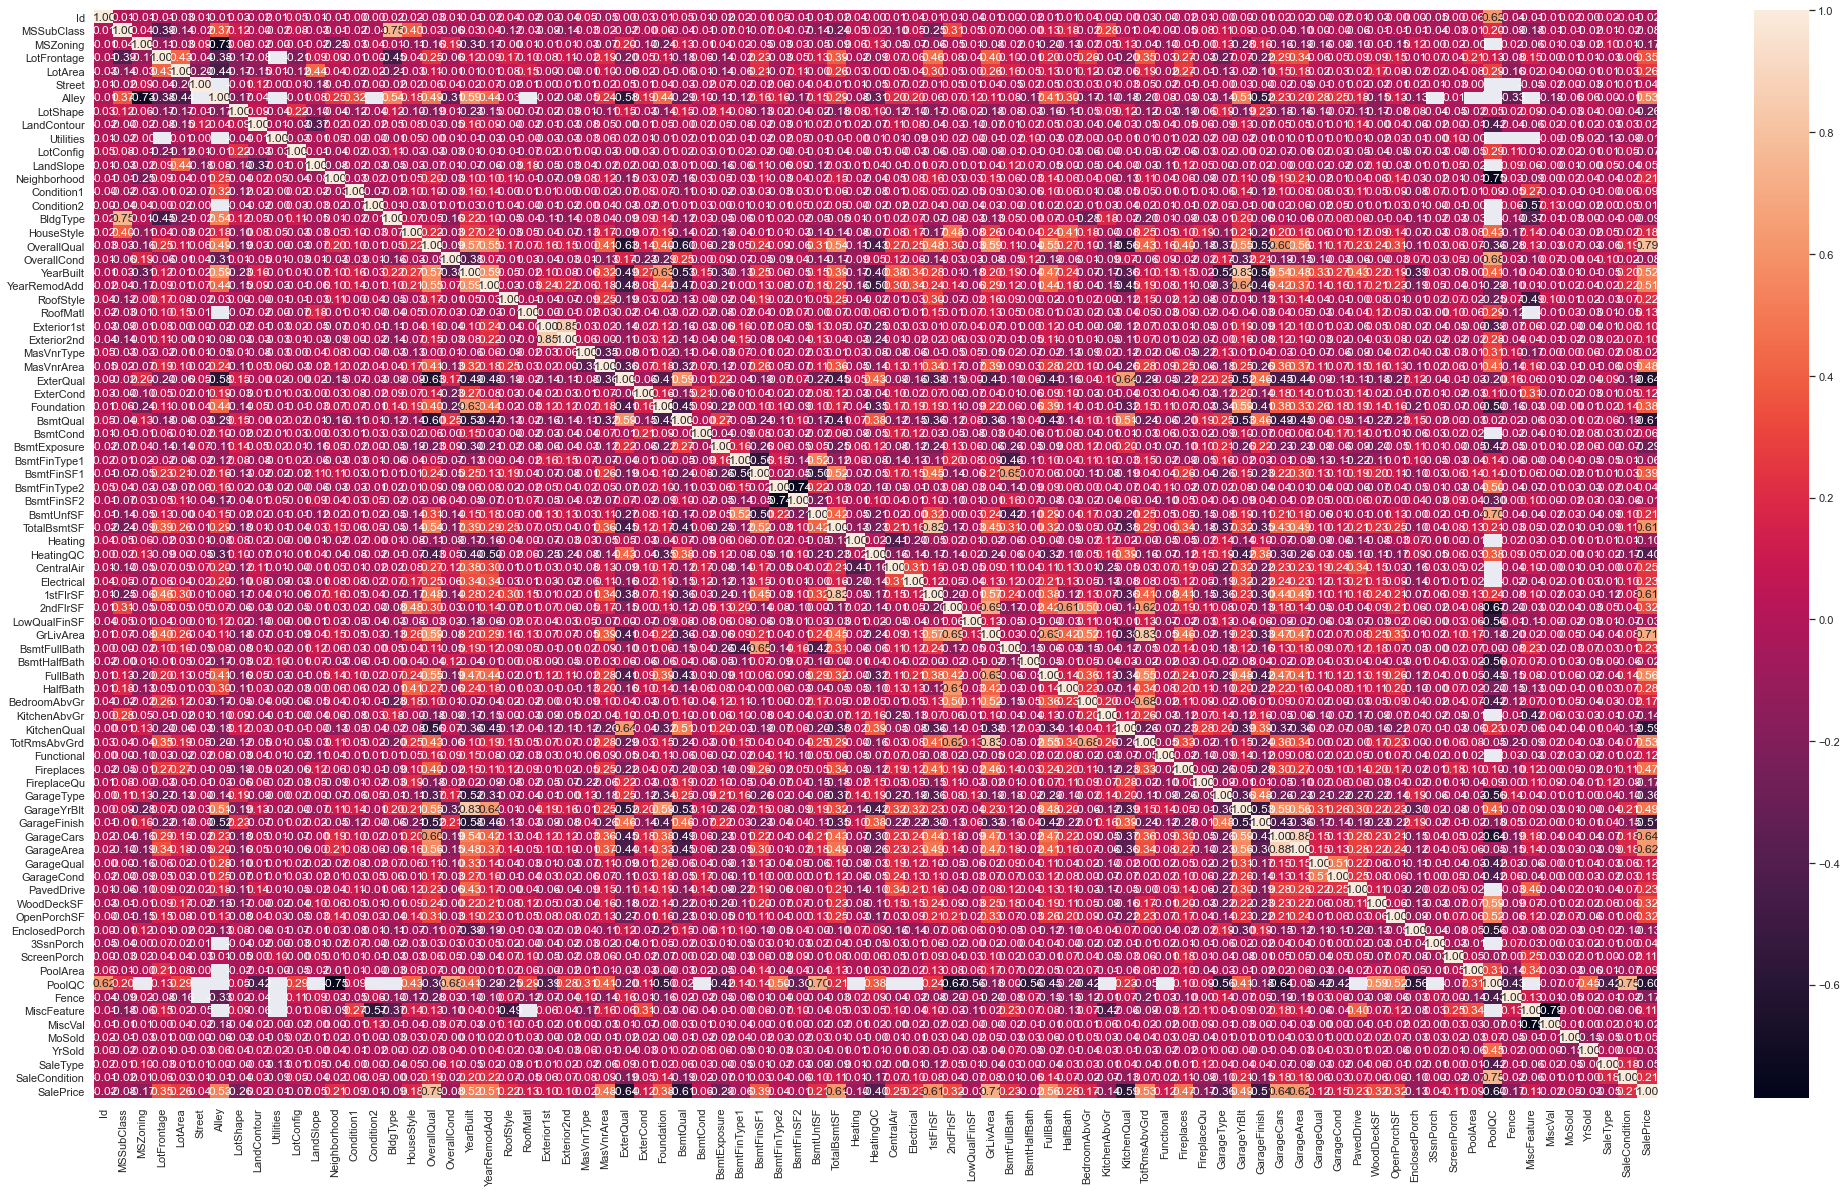

In [42]:
# correlation  between  all features 

plt.figure(figsize=(35,20))
sns.heatmap(df2.corr(), annot=True, fmt='0.2f');


In [43]:
# drop features have a lot of nan value 
df2=df2.drop(['Id','PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [45]:

corrmat = df2.corr()


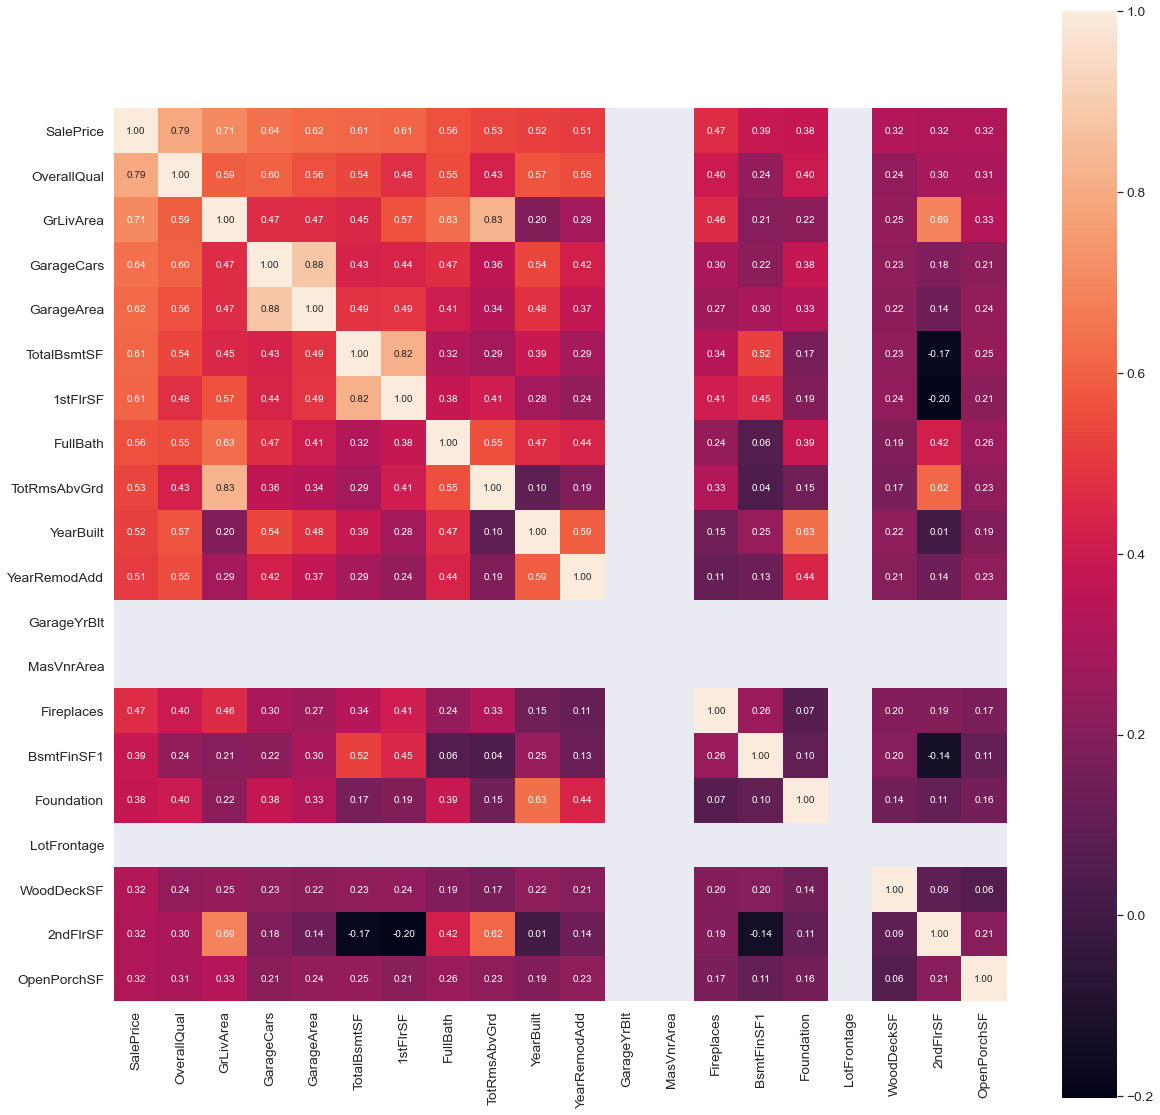

In [46]:
#  take 20 features have high correlation with the sale price 
plt.figure(figsize=(20,20))

k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



In [47]:
import warnings
sns.set()
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#sns.pairplot(df2[cols], size = 2.5)
#plt.show();

In [48]:
df_sales=df2[cols]
df_sales.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,Foundation,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,208500,7,1710,2,548,856,856,2,8,2003,2003,2003.0,196.0,0,706,2.0,65.0,0,854,61
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,1976.0,0.0,1,978,1.0,80.0,298,0,0
2,223500,7,1786,2,608,920,920,2,6,2001,2002,2001.0,162.0,1,486,2.0,68.0,0,866,42
3,140000,7,1717,3,642,756,961,1,7,1915,1970,1998.0,0.0,1,216,0.0,60.0,0,756,35
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,2000.0,350.0,1,655,2.0,84.0,192,1053,84


In [49]:
#check null value 
df_sales.isnull().sum()

SalePrice         0
OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt      81
MasVnrArea        8
Fireplaces        0
BsmtFinSF1        0
Foundation        0
LotFrontage     259
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
dtype: int64

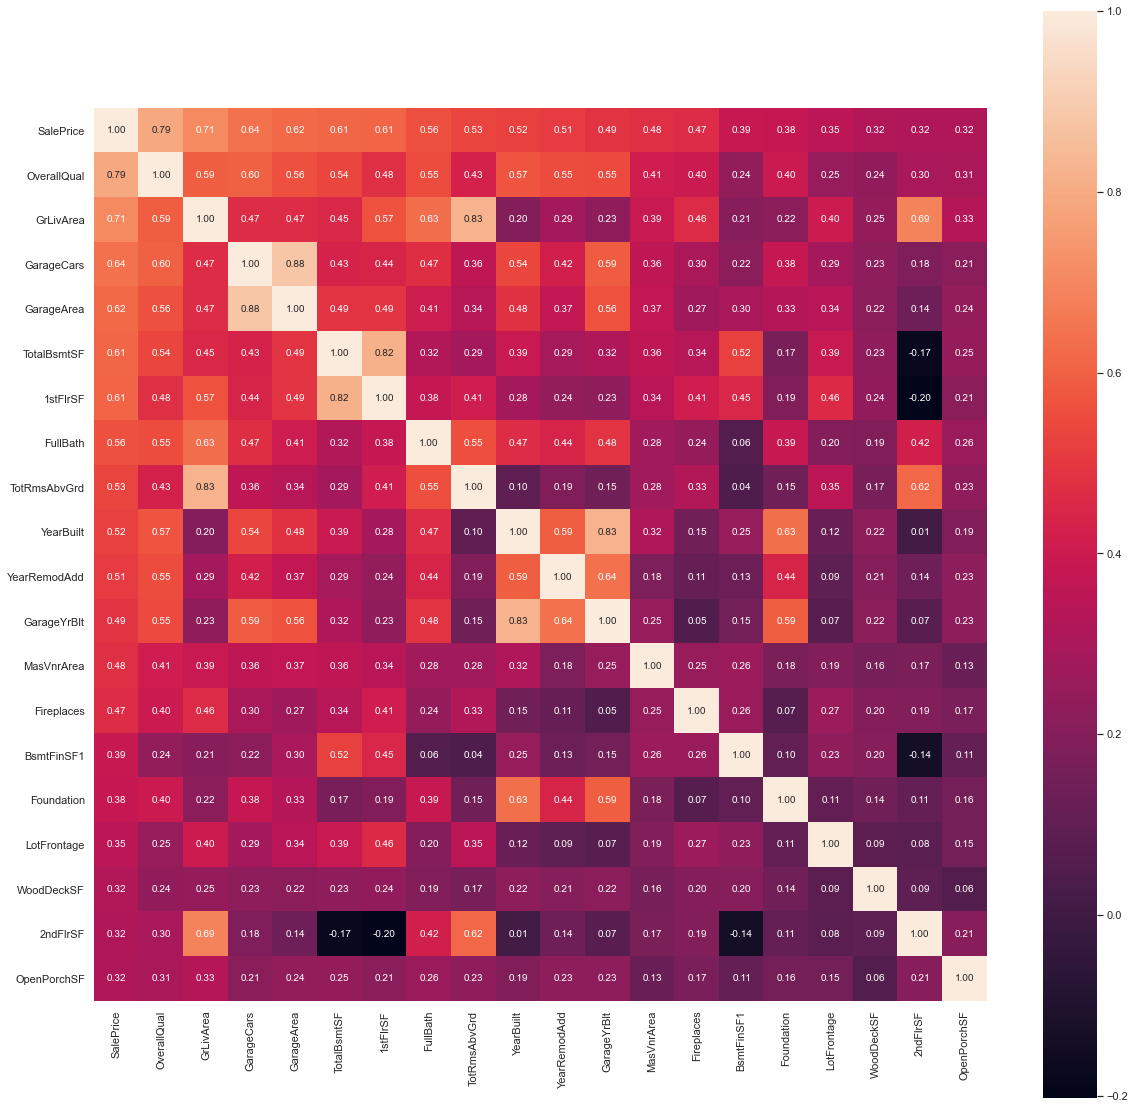

In [50]:
plt.figure(figsize=(20,20))


sns.heatmap(df_sales.corr(), annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()





In [51]:
df_sales=df_sales.dropna()

In [52]:
df_sales.columns


Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF'],
      dtype='object')

In [53]:
df_sales=df_sales.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt'],axis=1)

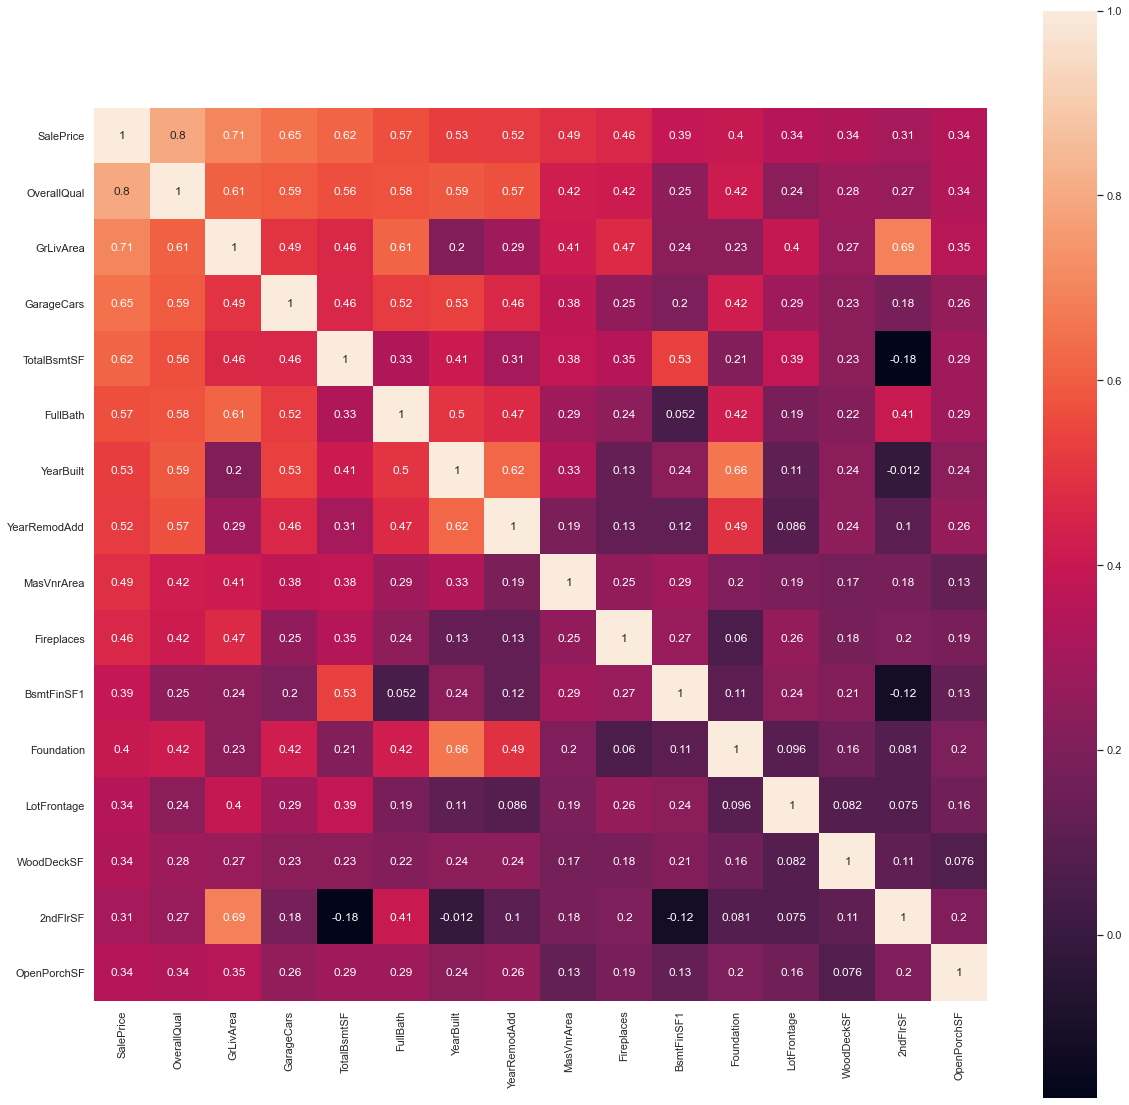

In [54]:
plt.figure(figsize=(20,20))


sns.heatmap(df_sales.corr(), annot=True, square=True)
plt.show()




In [55]:
df_sales.to_csv('data_salesprice2.csv', index=False)